In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
avocado_data = pd.read_csv('avocado.csv',index_col='Unnamed: 0')

In [6]:
avocado_data.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [7]:
avocado_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18249 entries, 0 to 11
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.9+ MB


In [137]:
avocado_data['Date'] = pd.to_datetime(avocado_data['Date'],errors='coerce')
avocado_data.set_index('Date',inplace=True)
avocado_data.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
Date,,,,,,,,,,,,
2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


### Dividing Numerical and categorical features


In [127]:
numerical_features = []
categorical_features = []
for i in avocado_data.columns:
    # print(i)
    if len(avocado_data[i].unique()) > 6:
        numerical_features.append(i)
    else:
        categorical_features.append(i)

numerical_features.remove('Date')
numerical_features.remove('AveragePrice')
numerical_features.remove('region')


- I have removed the **Date** columne from the numerical features because its not a numerical feature 
- I have also removed the **AveragePrice and region** columns bcoz i am gonna visualize them seperately

#### List of Numerical Features
- Total Volume 
- 4046 
- 4225 
- 4770
- Total Bags 
- Small Bags
- Large Bags 
- XLarge Bags

### List of categorical features
- type  
- year 

c:\Users\singh\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


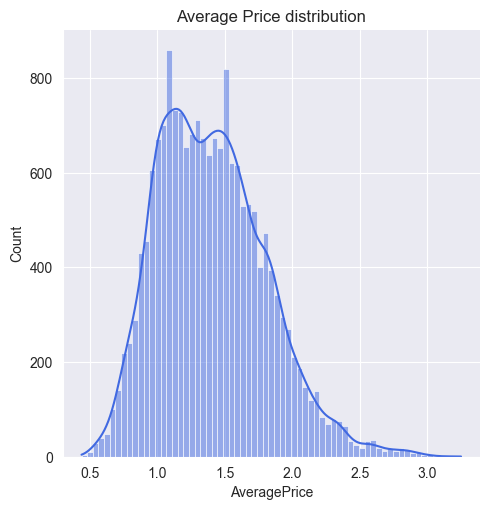

In [158]:
sns.set_style('darkgrid')
sns.displot(avocado_data['AveragePrice'],kde=True,color='royalblue')
plt.title('Average Price distribution')
plt.show()



### Observation
- Most avocado's are priced between **0.8 to 1.7** per unit.

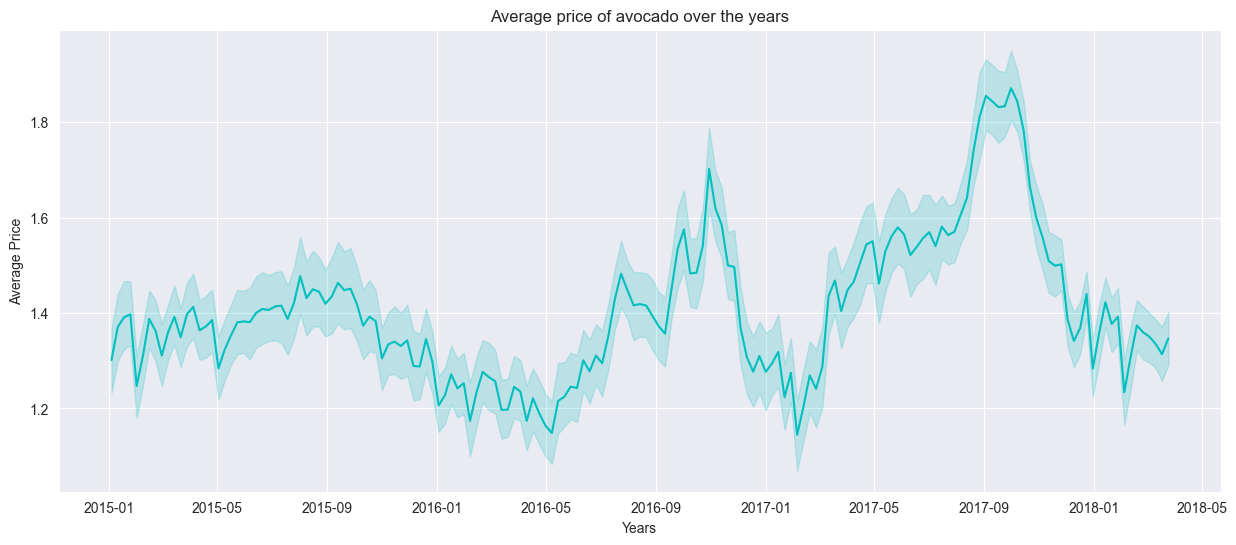

In [205]:
plt.figure(figsize=(15,6))
sns.lineplot(avocado_data,x='Date',y='AveragePrice',color='c')
plt.title('Average price of avocado over the years')
plt.xlabel('Years')
plt.ylabel('Average Price')
plt.show()

In [174]:
corr_data = [col for col in avocado_data.columns if avocado_data[col].dtype != 'O']
avocado_data[corr_data].corr()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
AveragePrice,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.177088,-0.174730,-0.172940,-0.117592,0.093197
Total Volume,-0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,0.967238,0.880640,0.747157,0.017193
4046,-0.208317,0.977863,1.000000,0.926110,0.833389,0.920057,0.925280,0.838645,0.699377,0.003353
4225,-0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,0.916031,0.810015,0.688809,-0.009559
4770,-0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,0.802733,0.698471,0.679861,-0.036531
Total Bags,-0.177088,0.963047,0.920057,0.905787,0.792314,1.000000,0.994335,0.943009,0.804233,0.071552
Small Bags,-0.174730,0.967238,0.925280,0.916031,0.802733,0.994335,1.000000,0.902589,0.806845,0.063915
Large Bags,-0.172940,0.880640,0.838645,0.810015,0.698471,0.943009,0.902589,1.000000,0.710858,0.087891
XLarge Bags,-0.117592,0.747157,0.699377,0.688809,0.679861,0.804233,0.806845,0.710858,1.000000,0.081033
year,0.093197,0.017193,0.003353,-0.009559,-0.036531,0.071552,0.063915,0.087891,0.081033,1.000000


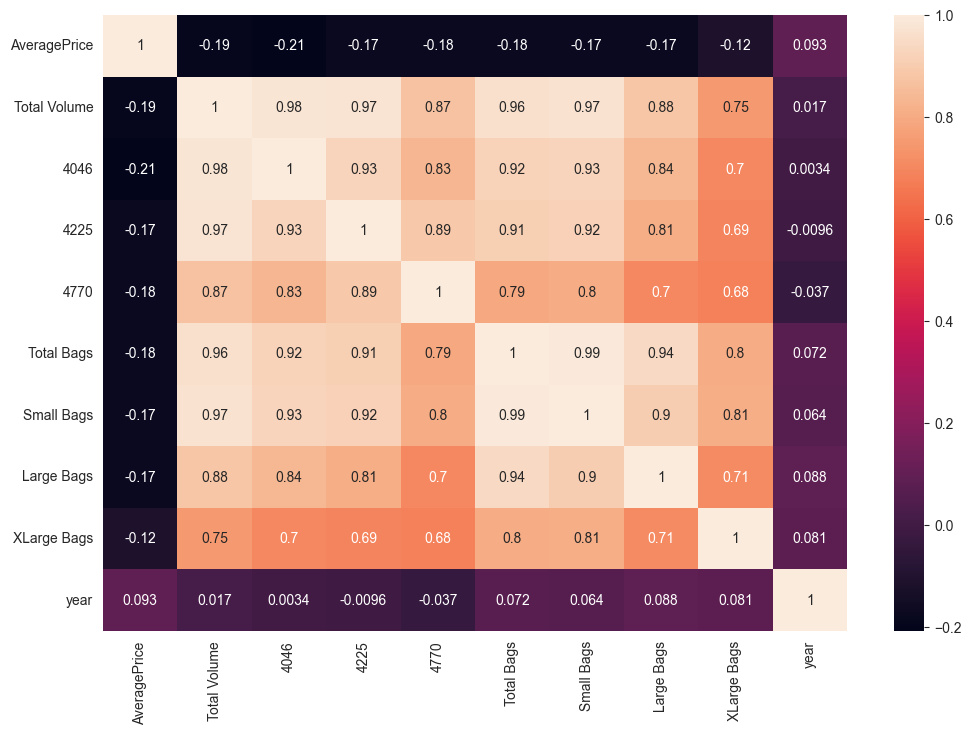

In [178]:


plt.figure(figsize=(12,8))
sns.heatmap(avocado_data[corr_data].corr(),annot=True,cmap='rocket')
plt.show()

In [182]:
avocado_data.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
Date,,,,,,,,,,,,
2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


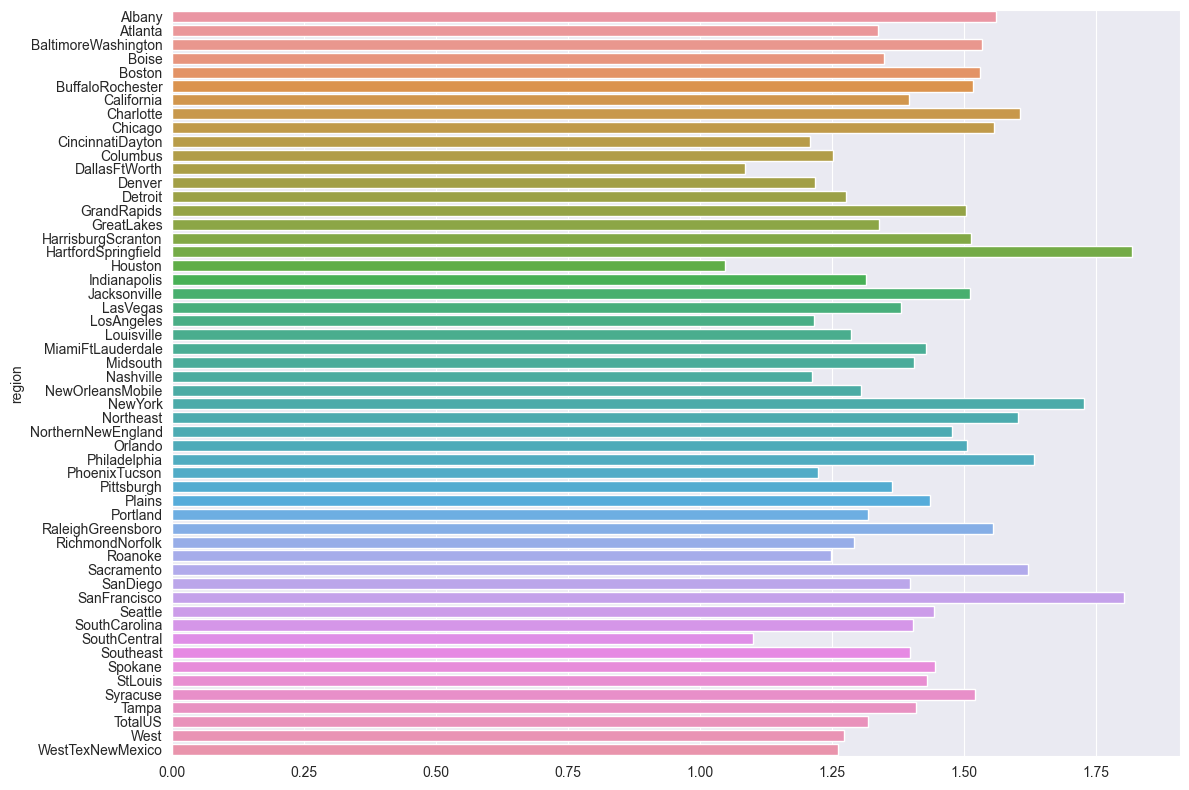

In [191]:
average_price_by_region = avocado_data.groupby('region')['AveragePrice'].mean()

plt.figure(figsize=(12,8))
sns.barplot(x=average_price_by_region.values,y=average_price_by_region.index)
plt.tight_layout()
plt.show()

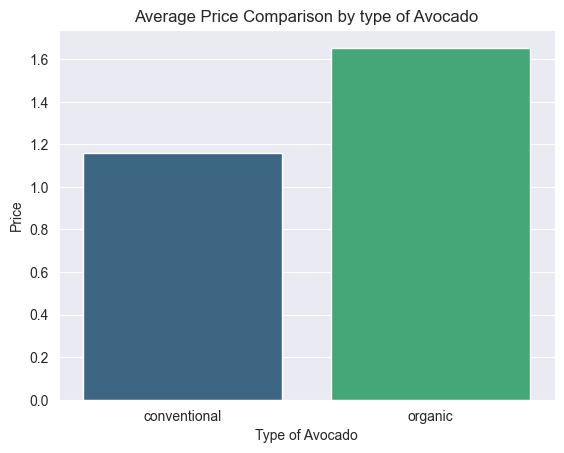

In [204]:
average_price_by_type = avocado_data.groupby('type')['AveragePrice'].mean()

sns.barplot(x=average_price_by_type.index,y=average_price_by_type.values,palette='viridis')
plt.title('Average Price Comparison by type of Avocado')
plt.xlabel('Type of Avocado')
plt.ylabel('Price')
plt.show()

In [206]:
avg_volume_by_region = avocado_data.groupby('region')['Total Volume'].mean()

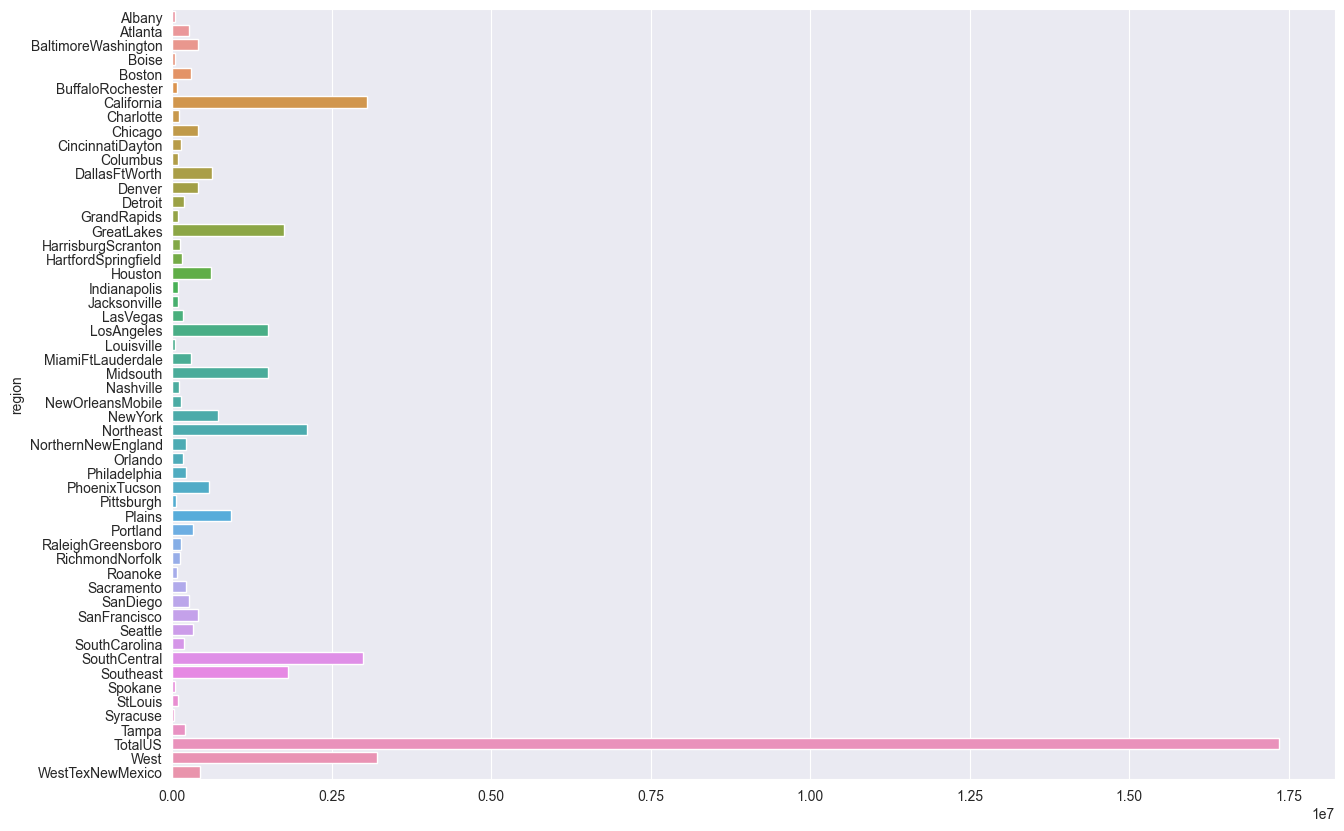

In [212]:
plt.figure(figsize=(15,10))
sns.barplot(x=avg_volume_by_region.values,y=avg_volume_by_region.index)
plt.show()